Notes:
    
    

In [1]:
import tensorflow as tf
import lib.data_loader as data_loader
import lib.plot_learning_curves as plot_learning_curves
import models.base_model as base_model
import models.densenet as densenet
import models.resnet as resnet
import models.inception_v3 as inception
import models.xception as xception
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import math
import matplotlib.image as mpimg
# from tqdm import tqdm
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import random, os
import numpy as np
import pandas as pd
import json

# import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from glob import glob
import gc
# from skimage.transform import resize
from tensorflow.keras import backend as K # Importing Keras backend (by default it is Tensorflow)
from tensorflow.keras.layers import Input, Conv2D, Dense, Dropout, Flatten, MaxPool2D # Layers to be used for building our model
from tensorflow.keras.models import Model # The class used to create a model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.random import set_seed

from sklearn.metrics import f1_score, recall_score, precision_score

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
! pip install -q -U keras-tuner
import keras_tuner as kt

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
print("Tensorflow version " + tf.__version__)

Tensorflow version 2.4.0
Train model
Tensorflow version 2.4.0
Tensorflow version 2.4.0
Tensorflow version 2.4.0
Tensorflow version 2.4.0
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Tensorflow version 2.4.0


In [2]:
# mount data
data_path = 'data/MURA-v1.1/'
directory = 'data/'
! pwd
train_generators, valid_generators, test_generators, test=data_loader.load_all("deep_augment")

/tf

Import train and test data

Doing a light data augmentation

Create training, validation and test set

Found 33109 validated image filenames.
Found 3699 validated image filenames.
Found 3197 validated image filenames.
Data munging completed


# Resnet

In [3]:
def clean_up(model):
    K.clear_session()
    del model
    gc.collect()

In [4]:
bodypart = '14classes'
# for bodypart in bodyparts:
print(bodypart)
print("\nBuild model\n")
model =  resnet.build_model_on_resnet_14classes()
print('\nTrain model\n')
print(bodypart)
history = resnet.train_model_14classes(model, 
                                     valid_generators,
                                     train_generators,
                                     50)
print('\nSave training history\n')
with open("data/history/history_resnet_14classes_top_50epochs_deep_augment_fixed_softmax.json", "w") as file:
    json.dump(history.history, file)
    print('\nSave model\n')
model.save("data/models/resnet_14classes_top_50epochs_deep_augment_fixed_softmax")
model.save("data/models/resnet_14classes_top_50epochs_deep_augment_fixed_softmax.h5")

14classes

Build model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 320, 320, 3)]     0         
_________________________________________________________________
resnet152 (Functional)       (None, 10, 10, 2048)      58370944  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 14)                28686     
Total params: 58,399,630
Trainable params: 28,686
Non-trainable params: 58,370,944
_________________________________________________________________

Train model

14classes
Using validation_steps = 15
Using steps_per_epoch = 65


/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
65/65 [==============================] - 765s 11s/step - loss: 2.7886 - accuracy: 0.1007 - val_loss: 2.4554 - val_accuracy: 0.1813
Epoch 2/50
65/65 [==============================] - 859s 13s/step - loss: 2.5576 - accuracy: 0.1346 - val_loss: 2.4257 - val_accuracy: 0.1625
Epoch 3/50
65/65 [==============================] - 903s 14s/step - loss: 2.5506 - accuracy: 0.1362 - val_loss: 2.5027 - val_accuracy: 0.1104
Epoch 4/50
65/65 [==============================] - 957s 15s/step - loss: 2.5343 - accuracy: 0.1232 - val_loss: 2.4278 - val_accuracy: 0.1479
Epoch 5/50
65/65 [==============================] - 983s 15s/step - loss: 2.5116 - accuracy: 0.1414 - val_loss: 2.4389 - val_accuracy: 0.1729
Epoch 6/50
65/65 [==============================] - 831s 13s/step - loss: 2.4730 - accuracy: 0.1509 - val_loss: 2.4630 - val_accuracy: 0.1375
Epoch 7/50
65/65 [==============================] - 693s 11s/step - loss: 2.4557 - accuracy: 0.1635 - val_loss: 2.4696 - val_accuracy: 0.1375
Epoch 

In [5]:
model.evaluate(test_generators, verbose=1)

100/100 [==============================] - 717s 7s/step - loss: 2.5858 - accuracy: 0.1517


[2.5858354568481445, 0.15170472860336304]

In [9]:
model.evaluate(train_generators, verbose=1)

1035/1035 [==============================] - 8569s 8s/step - loss: 2.3248 - accuracy: 0.1935


[2.3248074054718018, 0.19351233541965485]

In [8]:
model.evaluate(valid_generators, verbose=1)

116/116 [==============================] - 929s 8s/step - loss: 2.3217 - accuracy: 0.1933


[2.321674346923828, 0.19329547882080078]

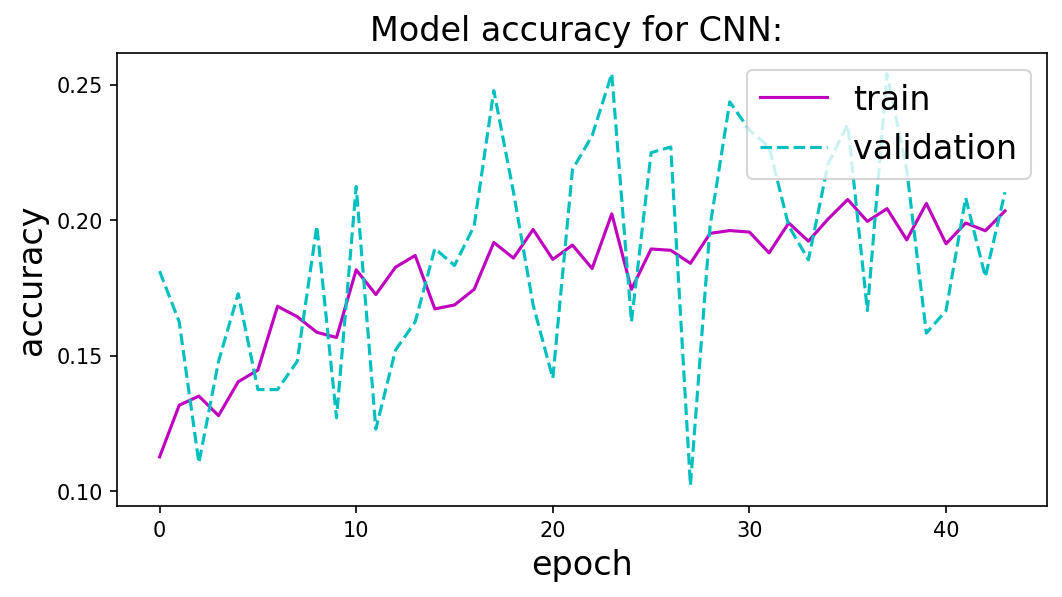

<Figure size 432x288 with 0 Axes>

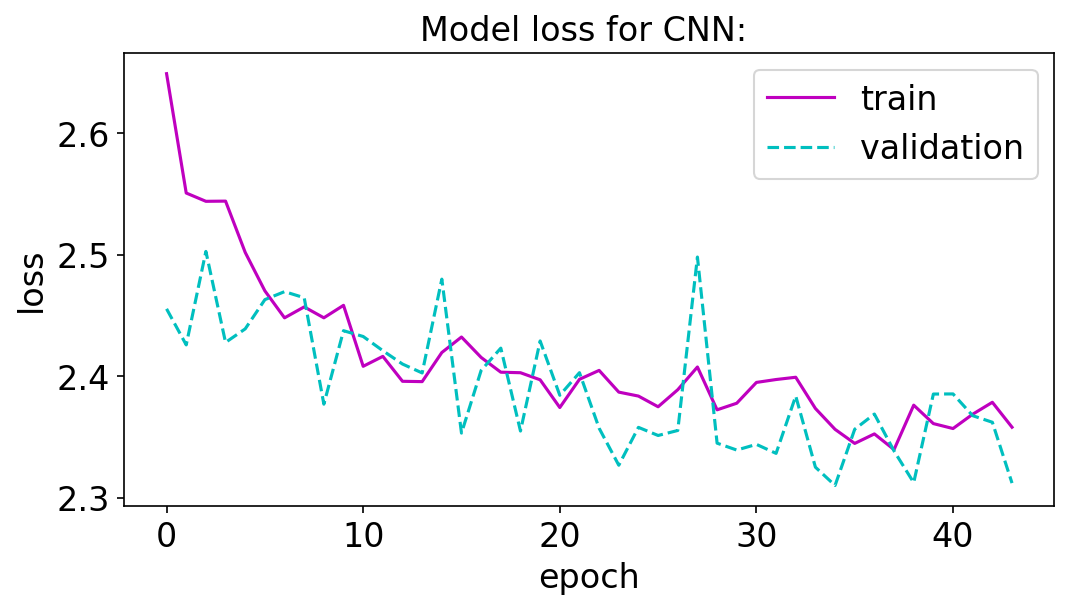

<Figure size 432x288 with 0 Axes>

In [7]:
plot_learning_curves.plot_history_all(history, 
                                     'resnet_14classes_model_top_fixed_softmax',
                                     50,
                                     data_augmentation='deep_augment')